## Homework 8

Make a copy of this and save as "hw7_name.ipynb"

Name: Dan Jang

Comments for instructor:


### Exercise 7.3 Fourier transforms of musical instruments

You will find the files *piano.txt* and *trumpet.txt* on Canvas (also on the online resources for our textbook), which contain data representing the waveform of a single note, played on, respectively, a piano and a trumpet.

**a)** Write a program that loads a waveform from one of these files, plots it, then calculates its discrete Fourier transform and plots the magnitudes of the first 10,000 coefficients.  Apply your program to the piano and trumpet waveforms. Plot the waveform and transform separately for each instrument and title. Note that you will have to use a fast Fourier transform for the calculation because there are too many samples in the files to do the transforms the slow way in any reasonable amount of time. A suitable function is numpy.fft.rfft().

https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html

Apply your program to the piano and trumpet waveforms and 

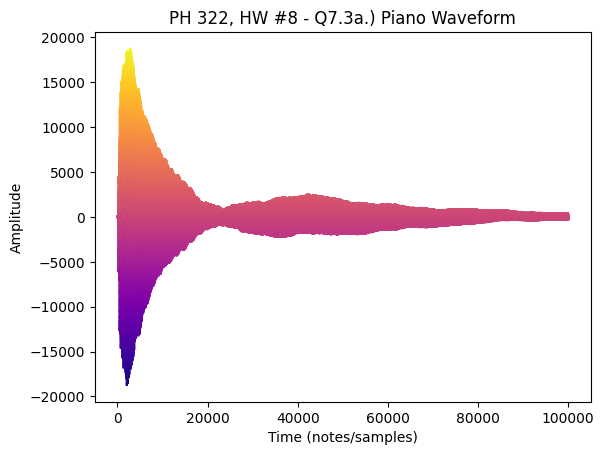

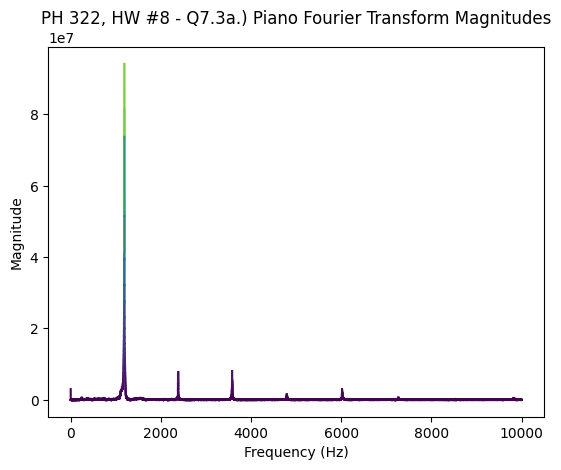

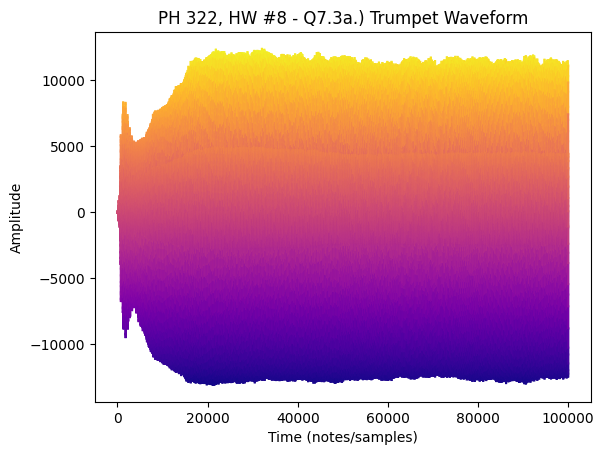

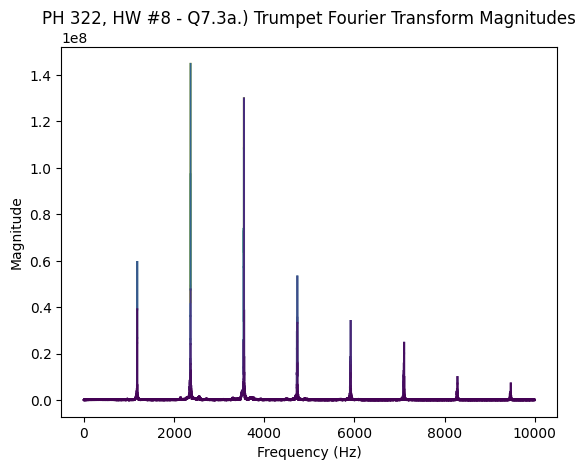

In [2]:
### PH322 - HW #8 - Q7.3a. - Dan Jang
## Credits to ChatGPT for numpy & matplotlib implementation
## Note: Program does take a few minutes to run, but the resultant graphs are gorgeous, I think.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # for the pretty color graph spectrumization

def spectrumize(x, y, cmap, normalize=True):
    if normalize:
        y_normalized = (y - y.min()) / (y.max() - y.min())
    else:
        y_normalized = y

    for i in range(1, len(x)):
        plt.plot(x[i-1:i+1], y[i-1:i+1], color=cmap(y_normalized[i]))

def muse(file, instrument):
    # Load waveform data from the file
    waveform = np.loadtxt(file)

    # Plot the waveform
    plt.figure()
    #plt.plot(waveform, color=cm.plasma(0.5))
    spectrumize(np.arange(len(waveform)), waveform, cm.plasma)
    plt.title(f"PH 322, HW #8 - Q7.3a.) {instrument} Waveform")
    plt.xlabel("Time (notes/samples)")
    plt.ylabel("Amplitude")
    plt.show()

    # Calculate the discrete Fourier transform using the fast Fourier transform
    fourier_transform = np.fft.rfft(waveform)

    # Plot the magnitudes of the first 10,000 coefficients
    plt.figure()
    #plt.plot(np.abs(fourier_transform)[:10000], color=cm.viridis(0.5))
    spectrumize(np.arange(10000), np.abs(fourier_transform)[:10000], cm.viridis)
    plt.title(f"PH 322, HW #8 - Q7.3a.) {instrument} Fourier Transform Magnitudes")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

def main():
    # Apply the program to the piano and trumpet waveforms
    muse("piano.txt", "Piano")
    muse("trumpet.txt", "Trumpet")

if __name__ == "__main__":
    main()

## Side-Note: Another interesting possible topic/question for a PH322 problem may be
##           implementing a live microphone-based 'tuner' using the FFT algorithm, I recall doing FFT stuff
##           from a Computer Science class, CS 410P (Music, Sound, & Computers) - which was a slight
##           pain to figure out, but was pretty cool. The class also used Python & numpy FFT functions for the music stuffs.



**Pts /10**

**b)** Discuss briefly what one can conclude about the sound of the piano and trumpet from the plots of Fourier coefficients. 

Pianos are usually used as 'absolute' notes as they tend to have less variation in the frequency, but trumpets are less tonally neutral, and have those characteristic frequency spikes that are more prominant for any given note of the trumpet, in comparison to the piano. The piano also has a quick drop-off in magnitude in the waveform graph compared to the trumpet.

Specifically, we see above that the piano's peak frequencies lay within the ~1000 to 2000 Hz ranges, while the trumpet seems to have a peak, then multiple, smaller adjacent frequency peaks.

**Pts /5**

**c)** 
Both waveforms were recorded at the industry-standard rate of 44,100 samples per second and both instruments were playing the same musical note when the recordings were made.  From your Fourier transform results calculate what note they were playing.  (Hint: The musical note middle C has a frequency of 261 Hz.)

In [7]:
### PH322 - HW #8 - Q7.3c. - Dan Jang
## Credits to ChatGPT for the numpy implementation

import numpy as np

def frequency_to_note(frequency):
    # Convert the frequency to the nearest note using the equal temperament tuning formula
    note_number = int(round(69 + 12 * np.log2(frequency / 440)))
    note_names = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    octave = note_number // 12 - 1
    note_name = note_names[note_number % 12]
    return f"{note_name}{octave}"

def muse(file, instrument):
    # Load waveform data from the file
    waveform = np.loadtxt(file)

    # Calculate the discrete Fourier transform using the fast Fourier transform
    fourier_transform = np.fft.rfft(waveform)

    # Find the index with the highest magnitude in the Fourier transform results
    peak_index = np.argmax(np.abs(fourier_transform))

    # Calculate the frequency corresponding to the peak index
    sample_rate = 44100
    frequency = peak_index * sample_rate / len(waveform)

    # Convert the frequency to the nearest musical note
    note = frequency_to_note(frequency)
    print(f"For the {instrument}, its note was identified as: {note} (with a frequency of {frequency} Hz)")

def main():
    # Apply the program to the piano and trumpet waveforms
    muse("piano.txt", "Piano")
    muse("trumpet.txt", "Trumpet")

if __name__ == "__main__":
    main()


For the Piano, its note was identified as: C5 (with a frequency of 524.79 Hz)
For the Trumpet, its note was identified as: C6 (with a frequency of 1043.847 Hz)


**Pts /5**

**Total Exercise Pts /20**

## Exercise 7.6: Comparison of the DFT and DCT 

There is a file called *dow2.txt*, which contains data on the Dow Jones Industrial Average from 2004 until 2008. Over this period the value changed considerably from a starting level around 9000 to a final level around 14000.
 
**a)**
Write a program in which you read the data in the file *dow2.txt* and plot it on a graph.  Then smooth the data by calculating its Fourier transform, setting all but the first 2\% of the coefficients to zero, and inverting the transform again, plotting the result on the same graph as the original data.  You should see that the data are smoothed, but now there will be an additional artifact.  At the beginning and end of the plot you should see large deviations away from the true smoothed function.  These occur because the function is required to be periodic---its last value must be the same as its first---so it needs to deviate substantially from the correct value to make the two ends of the function meet.  In some situations (including this one) this behavior is unsatisfactory.  If we want to use the Fourier transform for smoothing, we would certainly prefer that it not introduce artifacts of this kind.

Make sure your program outputs the original and smoothed data on the same plot, with a legend and title indicating its the DFT. 

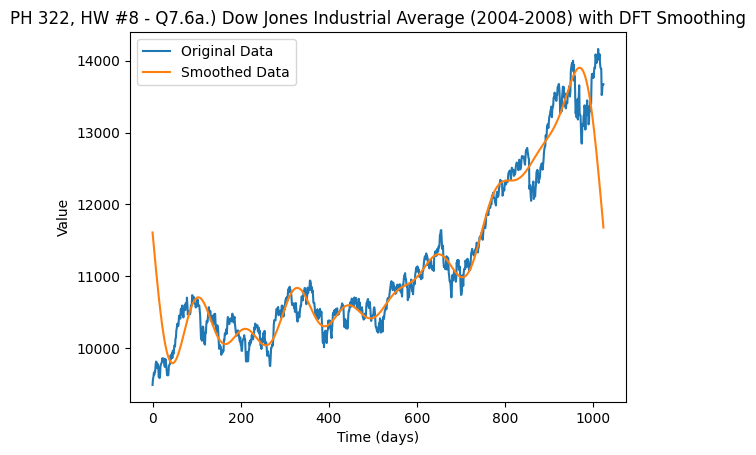

In [8]:
### PH322 - HW #8 - Q7.6a. - Dan Jang
## Credits to ChatGPT for numpy & matplotlib implementation

import numpy as np
import matplotlib.pyplot as plt

def smooth_data(data, percentage=2):
    # Calculate the discrete Fourier transform using the fast Fourier transform
    fourier_transform = np.fft.rfft(data)

    # Set all but the first 2% of the coefficients to zero
    n_coefficients = int(len(fourier_transform) * percentage / 100)
    fourier_transform[n_coefficients:] = 0

    # Invert the Fourier transform to get the smoothed data
    smoothed_data = np.fft.irfft(fourier_transform)

    return smoothed_data

# Read the data from the "dow2.txt" file
dow_data = np.loadtxt("dow2.txt")

# Smooth the data using the Fourier transform
smoothed_data = smooth_data(dow_data)

# Plot the original and smoothed data on the same graph
plt.figure()
plt.plot(dow_data, label="Original Data (DFT)")
plt.plot(smoothed_data, label="Smoothed Data (DCT)")
plt.title("PH 322, HW #8 - Q7.6a.) Dow Jones Industrial Average (2004-2008) with DFT Smoothing")
plt.xlabel("Time (days)")
plt.ylabel("Value")
plt.legend()
plt.show()

**Pts /10**

**b)** 
Modify your program to repeat the same analysis using discrete cosine transforms.  You can use the functions from _dcst.py_ to perform the transforms if you wish.  Again discard all but the first 2\% of the coefficients, invert the transform, and plot the result.  You should see a significant improvement, with less distortion of the function at the ends of the interval.  This occurs because, as discussed at the end of Section 7.3, the cosine transform does not force the value of the function to be the same at both ends.

Make sure your program outputs the original and smoothed data on the same plot, with legend and title indicating its the DCT.

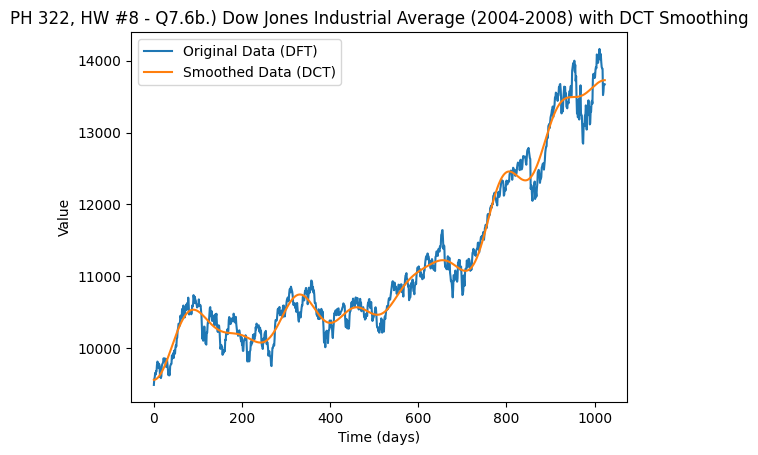

In [15]:
### PH322 - HW #8 - Q7.6b. - Dan Jang
## Credits to ChatGPT for numpy, scipy, & matplotlib implementation

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

def smooth_data_dct(data, percentage=2):
    # Calculate the discrete cosine transform
    cosine_transform = dct(data)
    
    # Normalize the cosine transform by dividing it by 2
    cosine_transform /= 2

    # Set all but the first 2% of the coefficients to zero
    n_coefficients = int(len(cosine_transform) * percentage / 100)
    cosine_transform[n_coefficients:] = 0

    # Invert the cosine transform to get the smoothed data
    smoothed_data = idct(cosine_transform) / len(data)

    return smoothed_data

# Read the data from the "dow2.txt" file
dow_data = np.loadtxt("dow2.txt")

# Smooth the data using the discrete cosine transform
smoothed_data_dct = smooth_data_dct(dow_data)

# Plot the original and smoothed data on the same graph
plt.figure()
plt.plot(dow_data, label="Original Data (DFT)")
plt.plot(smoothed_data_dct, label="Smoothed Data (DCT)")
plt.title("PH 322, HW #8 - Q7.6b.) Dow Jones Industrial Average (2004-2008) with DCT Smoothing")
plt.xlabel("Time (days)")
plt.ylabel("Value")
plt.legend()
plt.show()

**Pts /10**

It is because of the artifacts introduced by the strict periodicity of the DFT that the cosine transform
is favored for many technological applications, such as audio compression. The artifacts
can degrade the sound quality of compressed audio and the cosine transform generally gives
better results.
The cosine transform is not wholly free of artifacts itself however. It’s true it does not
force the function to be periodic, but it does force the gradient to be zero at the ends of the
interval (which the ordinary Fourier transform does not). You may be able to see this in your
calculations for part (b) above. Look closely at the smoothed function and you should see that its slope is flat at the beginning and end of the interval. The distortion of the function
introduced is less than the distortion in part (a), but it’s there all the same. To reduce this effect,
audio compression schemes often use overlapped cosine transforms, in which transforms are
performed on overlapping blocks of samples, so that the portions at the ends of blocks, where
the worst artifacts lie, need not be used.

**Total Exercise Pts /20**

### Exercise 8.1 A low-pass filter 

Here is a simple electronic circuit with one resistor and one capacitor:

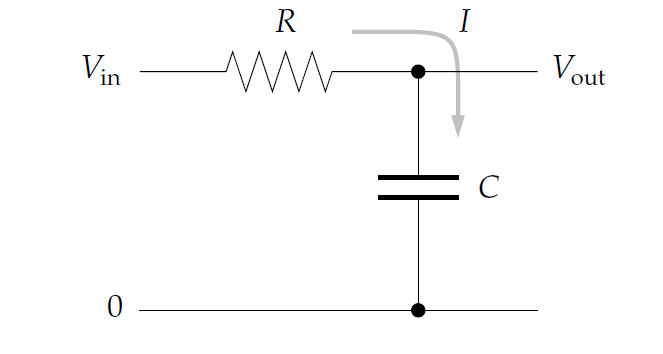

The circuit acts as a low-pass filter: you send a signal in on the left and it comes out filtered on the right.

Using Ohm's law and the capacitor law and assuming that the output load has very high impedance, so that a negligible amount of current flows through it, we can write down the equations governing this circuit as follows.  Let $I$ be the current that flows through $R$ and into the capacitor, and let $Q$ be the charge on the capacitor.  Then:

\begin{equation*}
IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
 Q = CV_\textrm{out}\,,\qquad
 I = {d Q\over d t}.
\end{equation*}

Substituting the second equation into the third, then substituting the result into the first equation, we find that $V_\textrm{in} - V_\textrm{out} = RC\>({d V_\textrm{out}/ d t})$, or equivalently

\begin{equation*}
{d V_\textrm{out}\over d t} = {1\over RC}
                               \bigl( V_\textrm{in} - V_\textrm{out} \bigr).
\end{equation*}

**a)**
Write a program to solve this equation for $V_\textrm{out}(t)$ using the fourth-order Runge--Kutta method when the input signal is a square-wave with frequency 1 and amplitude 1:

\begin{equation*}
V_\textrm{in}(t) = \begin{cases}
                     1  & \qquad\mbox{if $\lfloor 2t \rfloor$ is even,} \\
                     -1 & \qquad\mbox{if $\lfloor 2t \rfloor$ is odd,}
                   \end{cases}
\end{equation*}

where $\lfloor x\rfloor$ means $x$ rounded down to the next lowest integer. (can use the math or numpy floor() function).  Use your program to make plots of the output of the filter circuit from $t=0$ to $t=10$ when $RC=0.01$, $0.1$, and 1, with initial condition $V_\textrm{out}(0)=0$.  Label each RC series clearly. You will have to make a decision about what value of $h$ to use in your calculation.  Small values give more accurate results, but the program will take longer to run.  Try a variety of different values and choose one for your final calculations that seems sensible to you.

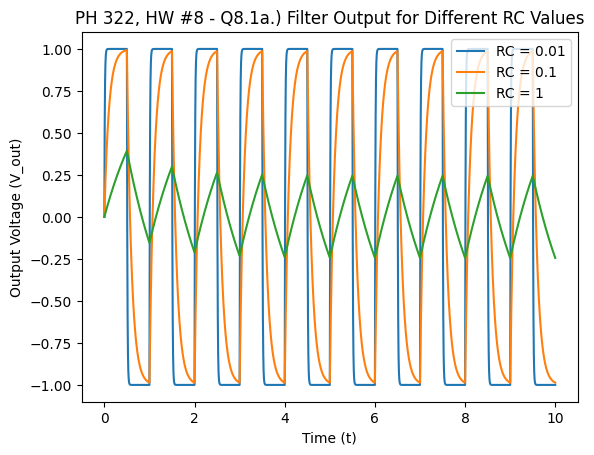

In [17]:
### PH322 - HW #8 - Q8.1a. - Dan Jang
## Credits to ChatGPT for numpy, math, & matplotlib implementation

import numpy as np
import matplotlib.pyplot as plt
from math import floor

def V_in(t):
    return 1 if floor(2*t) % 2 == 0 else -1

def dV_out(V_in, V_out, RC):
    return (V_in - V_out) / RC

def runge_kutta(V_in, V_out, RC, h):
    k1 = h * dV_out(V_in, V_out, RC)
    k2 = h * dV_out(V_in, V_out + 0.5 * k1, RC)
    k3 = h * dV_out(V_in, V_out + 0.5 * k2, RC)
    k4 = h * dV_out(V_in, V_out + k3, RC)
    
    return V_out + (k1 + 2*k2 + 2*k3 + k4) / 6

def solve_filter(RC, h=0.001, T=10):
    t_values = np.arange(0, T, h)
    V_out_values = np.zeros(len(t_values))
    
    for i in range(1, len(t_values)):
        V_out_values[i] = runge_kutta(V_in(t_values[i-1]), V_out_values[i-1], RC, h)
    
    return t_values, V_out_values

def plot_filter(RC_values):
    for RC in RC_values:
        t_values, V_out_values = solve_filter(RC)
        plt.plot(t_values, V_out_values, label=f"RC = {RC}")
    
    plt.xlabel("Time (t)")
    plt.ylabel("Output Voltage (V_out)")
    plt.title("PH 322, HW #8 - Q8.1a.) Filter Output for Different RC Values")
    plt.legend()
    plt.show()

RC_values = [0.01, 0.1, 1]
plot_filter(RC_values)

**Pts /10**

**b)** 
Based on the graphs produced by your program, describe what you see and explain what the circuit is doing.

We can see that when RC = 1, the low-pass circuit has the largest time constant, thus, the resistance & capacitance values will be large, where we see a 'smoother' curve compared to the other two RC values. At the lowest, when RC = 0.01, we see the least smooth curve, with a blocky, square / sawtooth wave shape. This is because the resistance & capacitance values are small, thus, the time constant is small, and the circuit is not able to smooth out the square wave as well.

**Pts /5**

**Total Exercise Pts /15**


## Exercise 8.3: The Lorenz equations

One of the most celebrated sets of differential equations in
physics is the Lorenz equations:
$$
{d x\over d t} = \sigma(y-x),\qquad
{d y\over d t} = rx - y - xz,\qquad
{d z\over d t} = xy - bz,
$$

where $\sigma$, $r$, and $b$ are constants.  (The names $\sigma$, $r$,
and $b$ are odd, but traditional---they are always used in these equations
for historical reasons.)

These equations were first studied by Edward Lorenz in 1963, who
derived them from a simplified model of weather patterns.  The
reason for their fame is that they were one of the first incontrovertible
examples of *deterministic chaos*, the occurrence of apparently
random motion even though there is no randomness built into the equations.


**Part a)** Write a program to solve the Lorenz equations for the case
  $\sigma=10$, $r=28$, and $b=\frac83$ in the range from $t=0$ to $t=50$
  with initial conditions $(x,y,z)=(0,1,0)$.  Have your program make a plot
  of $y$ as a function of time.  Note the unpredictable nature of the
  motion.  (Hint: If you base your program on previous ones, be careful.
  This problem has parameters $r$ and $b$ with the same names as variables
  in previous programs---make sure to give your variables new names, or use
  different names for the parameters, to avoid introducing errors into your
  code.). Choose a large number of time steps, otherwise the solution blows up.


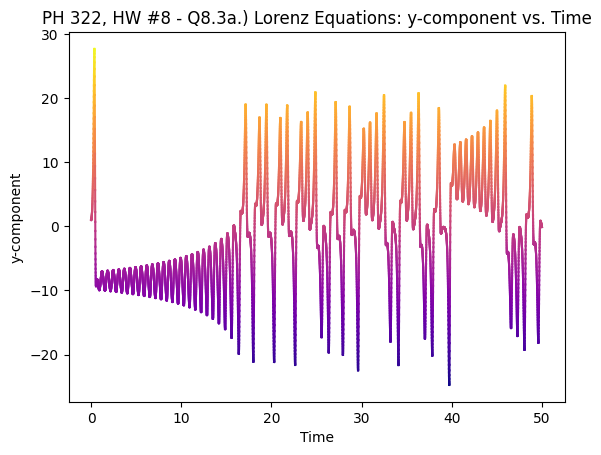

In [23]:
### PH322 - HW #8 - Q8.3a. - Dan Jang
## Credits to ChatGPT for numpy, scipy, & matplotlib implementation

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import cm

def spectrumize(x, y, cmap, normalize=True):
    if normalize:
        y_normalized = (y - y.min()) / (y.max() - y.min())
    else:
        y_normalized = y

    for i in range(1, len(x)):
        plt.plot(x[i-1:i+1], y[i-1:i+1], color=cmap(y_normalized[i]))

# Define the Lorenz system of equations
def lorenz_system(v, t, sigma, r, b):
    x, y, z = v
    dx_dt = sigma * (y - x)
    dy_dt = x * (r - z) - y
    dz_dt = x * y - b * z
    return [dx_dt, dy_dt, dz_dt]

# Parameters and initial conditions
sigma = 10
r = 28
b = 8/3
initial_conditions = (0, 1, 0)

# Time range
t_start = 0
t_end = 50
num_time_steps = 10000
time_points = np.linspace(t_start, t_end, num_time_steps)

# Solve the Lorenz equations
solution = odeint(lorenz_system, initial_conditions, time_points, args=(sigma, r, b))

# Extract y-component and plot it as a function of time
y_solution = solution[:, 1]
plt.plot(time_points, y_solution)
#spectrumize(time_points, y_solution, cm.plasma)
plt.xlabel('Time')
plt.ylabel('y-component')
plt.title('PH 322, HW #8 - Q8.3a.) Lorenz Equations: y-component vs. Time')
plt.show()

**Pts /10**

**Part b)** Modify your program to produce a plot of $z$ against $x$.  You should
  see a picture of the famous ``strange attractor'' of the Lorenz
  equations, a lop-sided butterfly-shaped plot that never repeats itself.

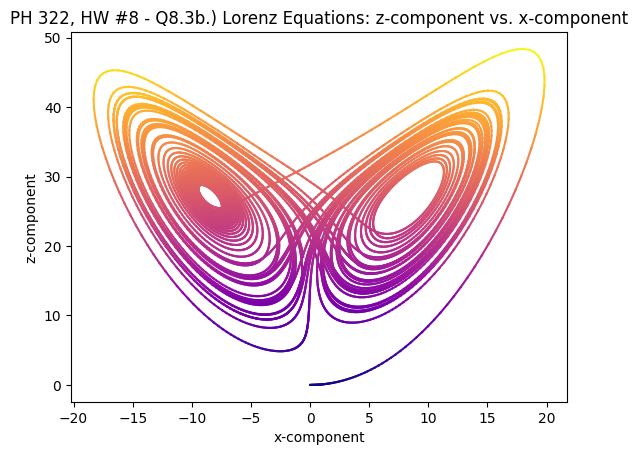

In [22]:
### PH322 - HW #8 - Q8.3b. - Dan Jang
## Credits to ChatGPT for numpy, scipy, & matplotlib implementation

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import cm

def spectrumize(x, y, cmap, normalize=True):
    if normalize:
        y_normalized = (y - y.min()) / (y.max() - y.min())
    else:
        y_normalized = y

    for i in range(1, len(x)):
        plt.plot(x[i-1:i+1], y[i-1:i+1], color=cmap(y_normalized[i]))

# Define the Lorenz system of equations
def lorenz_system(v, t, sigma, r, b):
    x, y, z = v
    dx_dt = sigma * (y - x)
    dy_dt = x * (r - z) - y
    dz_dt = x * y - b * z
    return [dx_dt, dy_dt, dz_dt]

# Parameters and initial conditions
sigma = 10
r = 28
b = 8/3
initial_conditions = (0, 1, 0)

# Time range
t_start = 0
t_end = 50
num_time_steps = 10000
time_points = np.linspace(t_start, t_end, num_time_steps)

# Solve the Lorenz equations
solution = odeint(lorenz_system, initial_conditions, time_points, args=(sigma, r, b))

# Extract x and z components and plot z against x
x_solution = solution[:, 0]
z_solution = solution[:, 2]
#plt.plot(x_solution, z_solution)
spectrumize(x_solution, z_solution, cm.plasma)
plt.xlabel('x-component')
plt.ylabel('z-component')
plt.title('PH 322, HW #8 - Q8.3b.) Lorenz Equations: z-component vs. x-component')
plt.show()

**Pts /5**

**Total Exercise Pts /15**

### Total HW Pts /70